# Plot individual differences in laterality for the in-house fMRI experiment

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import pandas as pd
code_dir = '/home/nblauch/git/imaging_neuro'
import sys
sys.path.append(code_dir)
from func.utils import plot_scatters, reject_df_outliers
from func import SUBNUMS_PAPER

In [2]:
all_results = pd.read_csv(f'{code_dir}/data/inhouse_fmri_mv-True.tsv', sep='\t')
# comment out the next two lines to use all subjects
all_results = all_results[all_results['subnum'].isin(SUBNUMS_PAPER)]
all_results = reject_df_outliers(all_results, m=3)

/home/nblauch/git/imaging_neuro/func/utils.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[is_outlier] = np.nan


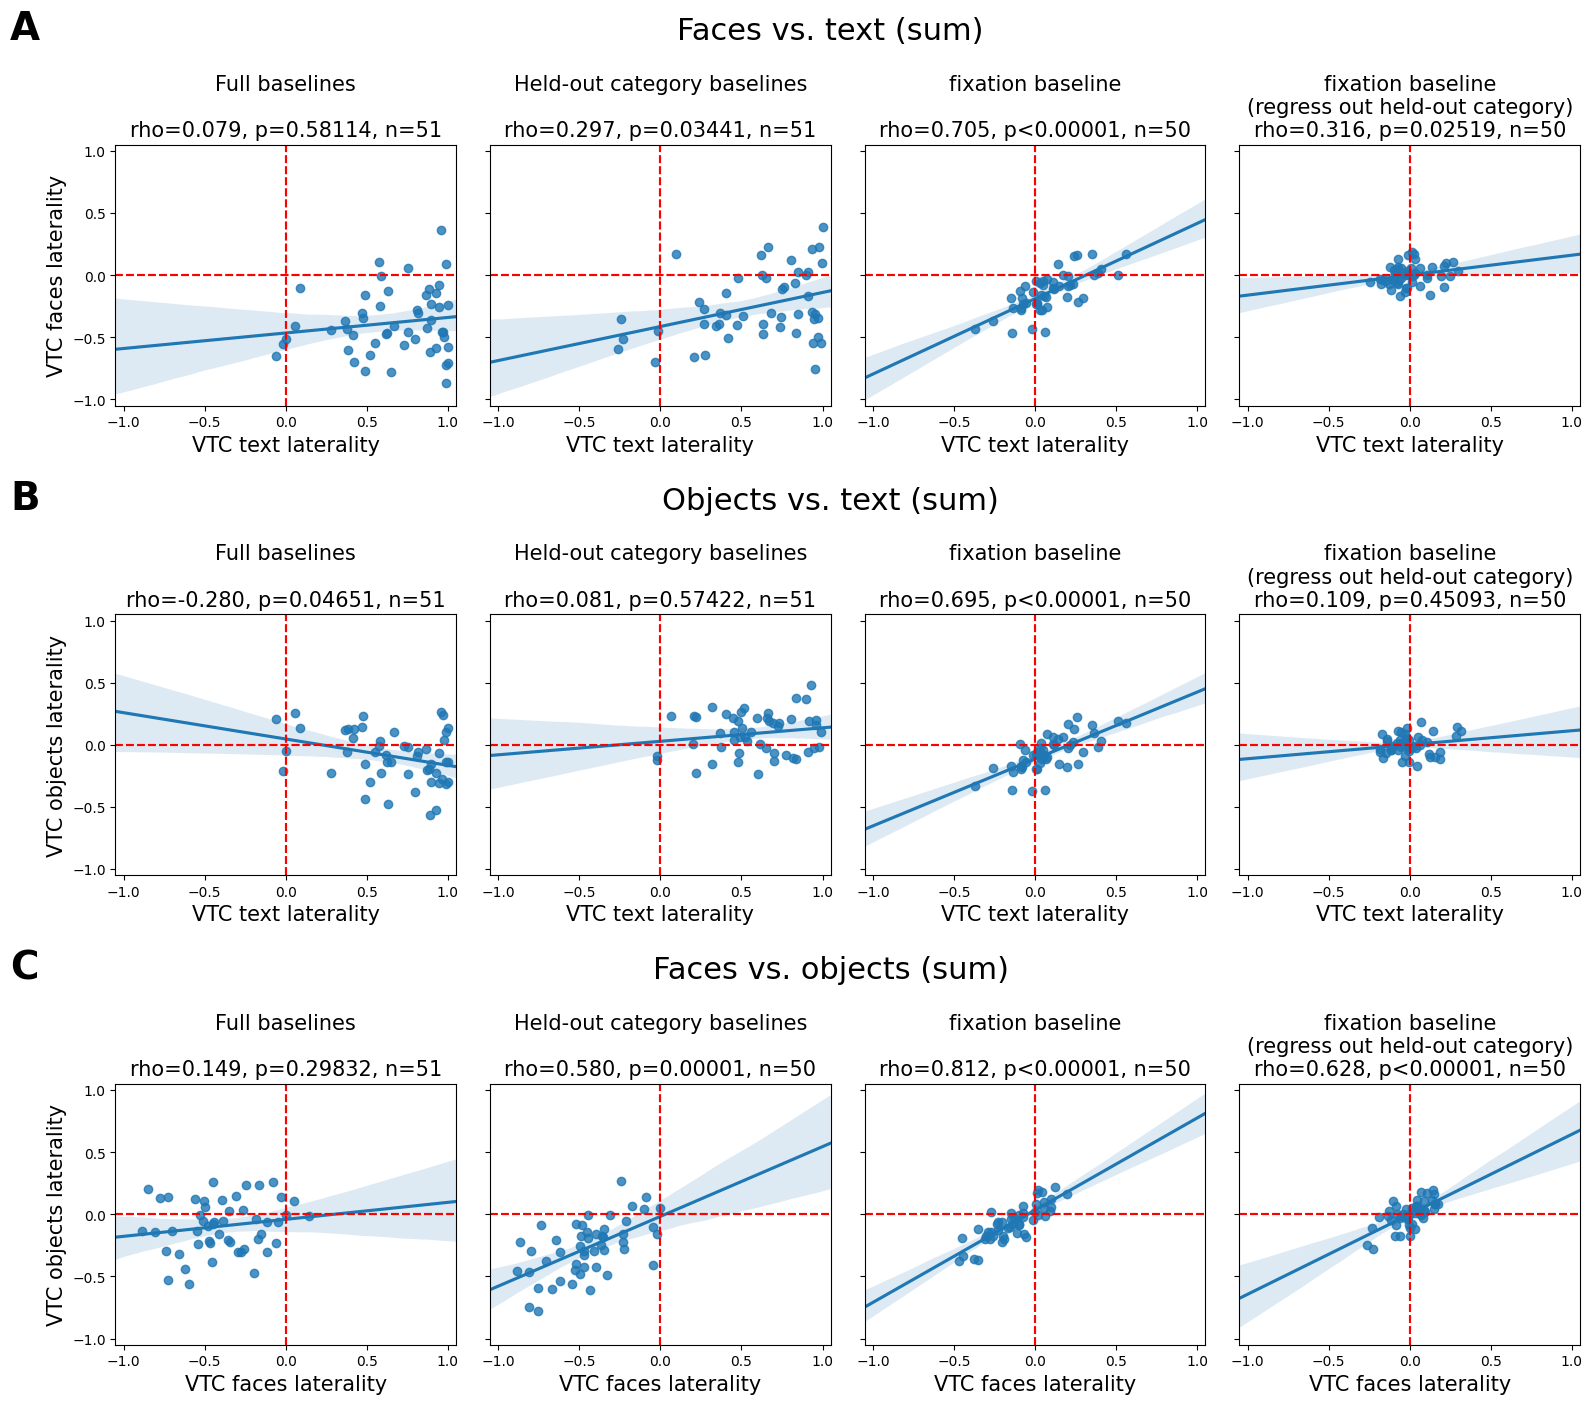

In [3]:
metrics = ['sum'] #, 'peak', 'nvox']
subsets = [['_even', '_odd']]
roi = '{roi}'
roi = 'VTC' # can also assess "LO"
kws=dict(standardize=False, plot=True, show=False, nuis_in_name=False, fontsize=15)
for metric in metrics:
    for subset1, subset2 in subsets:
        layout = [
            (f'{roi}_text_{metric}_laterality'+subset1, f'{roi}_faces_{metric}_laterality'+subset2, [], [], 'Full baselines\n', {'x_name':f'{roi} text laterality', 'y_name':f'{roi} faces laterality'}),
            (f'{roi}_text_vs_objects_{metric}_laterality'+subset1, f'{roi}_faces_vs_objects_{metric}_laterality'+subset2, [], [], 'Held-out category baselines\n', {'x_name':f'{roi} text laterality', 'y_name':f'{roi} faces laterality'}),
            (f'{roi}_text_vs_fixation_{metric}_laterality'+subset1, f'{roi}_faces_vs_fixation_{metric}_laterality'+subset2, [], [], 'fixation baseline\n', 
             {'x_name':f'{roi} text laterality', 'y_name':f'{roi} faces laterality'}),
            (f'{roi}_text_vs_fixation_{metric}_laterality'+subset1, f'{roi}_faces_vs_fixation_{metric}_laterality'+subset2, [f'{roi}_objects_vs_fixation_{metric}_laterality{subset1}'], [], 'fixation baseline\n(regress out held-out category)',{'x_name':f'{roi} text laterality', 'y_name':f'{roi} faces laterality'}),


            (f'{roi}_text_{metric}_laterality'+subset1, f'{roi}_objects_{metric}_laterality'+subset2, [], [], 'Full baselines\n', {'x_name':f'{roi} text laterality', 'y_name':f'{roi} objects laterality'}),
            (f'{roi}_text_vs_faces_{metric}_laterality'+subset1, f'{roi}_objects_vs_faces_{metric}_laterality'+subset2, [], [], 'Held-out category baselines\n', {'x_name':f'{roi} text laterality', 'y_name':f'{roi} objects laterality'}),            (f'{roi}_text_vs_fixation_{metric}_laterality'+subset1, f'{roi}_objects_vs_fixation_{metric}_laterality'+subset2, [], [], 'fixation baseline\n',
             {'x_name':f'{roi} text laterality', 'y_name':f'{roi} objects laterality'}),
            (f'{roi}_text_vs_fixation_{metric}_laterality'+subset1, f'{roi}_objects_vs_fixation_{metric}_laterality'+subset2, [f'{roi}_faces_vs_fixation_{metric}_laterality{subset1}'], [], 'fixation baseline\n(regress out held-out category)', {'x_name':f'{roi} text laterality', 'y_name':f'{roi} objects laterality'}),



            (f'{roi}_faces_{metric}_laterality'+subset1, f'{roi}_objects_{metric}_laterality'+subset2, [], [], 'Full baselines\n', {'x_name':f'{roi} faces laterality', 'y_name':f'{roi} objects laterality'}),
            (f'{roi}_faces_vs_text_{metric}_laterality'+subset1, f'{roi}_objects_vs_text_{metric}_laterality'+subset2, [], [], 'Held-out category baselines\n', {'x_name':f'{roi} faces laterality', 'y_name':f'{roi} objects laterality'}),
            (f'{roi}_faces_vs_fixation_{metric}_laterality'+subset1, f'{roi}_objects_vs_fixation_{metric}_laterality'+subset2, [], [], 'fixation baseline\n',
             {'x_name':f'{roi} faces laterality', 'y_name':f'{roi} objects laterality'}),
            (f'{roi}_faces_vs_fixation_{metric}_laterality'+subset1, f'{roi}_objects_vs_fixation_{metric}_laterality'+subset2, [f'{roi}_text_vs_fixation_{metric}_laterality{subset1}'], [], 'fixation baseline\n(regress out held-out category)', {'x_name':f'{roi} faces laterality', 'y_name':f'{roi} objects laterality'}),
        ]
        shape = (3,4)

        fig, axs = plot_scatters(layout, shape, all_results, 
                                 show_full=False, pwidth=4, pheight=4.5, sharey='row',
                                  **kws)
        axs = axs.reshape(shape)
        for ii, (letter, comparison) in enumerate(zip(['A', 'B', 'C'], [f'Faces vs. text ({metric})', f'Objects vs. text ({metric})', f'Faces vs. objects ({metric})'])):
            axs[ii,0].text(-1.7, 1.9, letter, fontsize=28, fontweight='bold')
            axs[ii,1].text(1.05, 1.9, comparison, fontsize=22, horizontalalignment='center')
            axs[ii,0].set_yticks([-1,-0.5,0,0.5,1])
            for jj in range(1,shape[1]):
                axs[ii,jj].set_ylabel('')
        plt.subplots_adjust(hspace=0.8, wspace=0.1)
        plt.show()